In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('regression_data.csv')

In [3]:
data.columns

Index(['7129300520', '10/13/14', '3', '1', '1180', '5650', '1.1', '0', '0.1',
       '3.1', '7', '1180.1', '0.2', '1955', '0.3', '98178', '47.5112',
       '-122.257', '1340', '5650.1', '221900'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   7129300520  21596 non-null  int64  
 1   10/13/14    21596 non-null  object 
 2   3           21596 non-null  int64  
 3   1           21596 non-null  float64
 4   1180        21596 non-null  int64  
 5   5650        21596 non-null  int64  
 6   1.1         21596 non-null  float64
 7   0           21596 non-null  int64  
 8   0.1         21596 non-null  int64  
 9   3.1         21596 non-null  int64  
 10  7           21596 non-null  int64  
 11  1180.1      21596 non-null  int64  
 12  0.2         21596 non-null  int64  
 13  1955        21596 non-null  int64  
 14  0.3         21596 non-null  int64  
 15  98178       21596 non-null  int64  
 16  47.5112     21596 non-null  float64
 17  -122.257    21596 non-null  float64
 18  1340        21596 non-null  int64  
 19  5650.1      21596 non-nul

In [5]:
## renombramos columnas
data.columns=['id','date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zip_code','lat','lon','sqft_living15','sqft_lot15','price']

In [6]:
data

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      6414100192   12/9/14         3       2.25         2570      7242   
1      5631500400   2/25/15         2       1.00          770     10000   
2      2487200875   12/9/14         4       3.00         1960      5000   
3      1954400510   2/18/15         3       2.00         1680      8080   
4      7237550310   5/12/14         4       4.50         5420    101930   
...           ...       ...       ...        ...          ...       ...   
21591   263000018   5/21/14         3       2.50         1530      1131   
21592  6600060120   2/23/15         4       2.50         2310      5813   
21593  1523300141   6/23/14         2       0.75         1020      1350   
21594   291310100   1/16/15         3       2.50         1600      2388   
21595  1523300157  10/15/14         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         2.0           0     0          3  ...        2170            400   
1         1.0           0     0          3  ...         770              0   
2         1.0           0     0          5  ...        1050            910   
3         1.0           0     0          3  ...        1680              0   
4         1.0           0     0          3  ...        3890           1530   
...       ...         ...   ...        ...  ...         ...            ...   
21591     3.0           0     0          3  ...        1530              0   
21592     2.0           0     0          3  ...        2310              0   
21593     2.0           0     0          3  ...        1020              0   
21594     2.0           0     0          3  ...        1600              0   
21595     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zip_code      lat      lon  sqft_living15  \
0          1951          1991     98125  47.7210 -122.319           1690   
1          1933             0     98028  47.7379 -122.233           2720   
2          1965             0     98136  47.5208 -122.393           1360   
3          1987             0     98074  47.6168 -122.045           1800   
4          2001             0     98053  47.6561 -122.005           4760   
...         ...           ...       ...      ...      ...            ...   
21591      2009             0     98103  47.6993 -122.346           1530   
21592      2014             0     98146  47.5107 -122.362           1830   
21593      2009             0     98144  47.5944 -122.299           1020   
21594      2004             0     98027  47.5345 -122.069           1410   
21595      2008             0     98144  47.5941 -122.299           1020   

       sqft_lot15    price  
0            7639   538000  
1            8062   180000  
2            5000   604000  
3            7503   510000  
4          101930  1230000  
...           ...      ...  
21591        1509   360000  
21592        7200   400000  
21593        2007   402101  
21594        1287   400000  
21595        1357   325000  

[21596 rows x 21 columns]

In [7]:
## eliminamos duplicados, valores nulos y columnas irelevantes
data = data.drop_duplicates()
data = data.drop(['id', 'date', 'sqft_living', 'sqft_lot'], axis=1)

In [8]:
## comprobamos cuantos NaNs hay

for e in data.columns:
    print(e,data[e].isna().sum(),"NaN", ' ',int((data[e].isna().sum()/data.shape[0])*100))

bedrooms 0 NaN   0
bathrooms 0 NaN   0
floors 0 NaN   0
waterfront 0 NaN   0
view 0 NaN   0
condition 0 NaN   0
grade 0 NaN   0
sqft_above 0 NaN   0
sqft_basement 0 NaN   0
yr_built 0 NaN   0
yr_renovated 0 NaN   0
zip_code 0 NaN   0
lat 0 NaN   0
lon 0 NaN   0
sqft_living15 0 NaN   0
sqft_lot15 0 NaN   0
price 0 NaN   0


In [9]:
## en vez de eliminar null values los cambiamos por la mediana 

##datam = np.mean(data['median_home_val'])
##data['median_home_val'] = data['median_home_val'].fillna(mean_median_home_value)

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

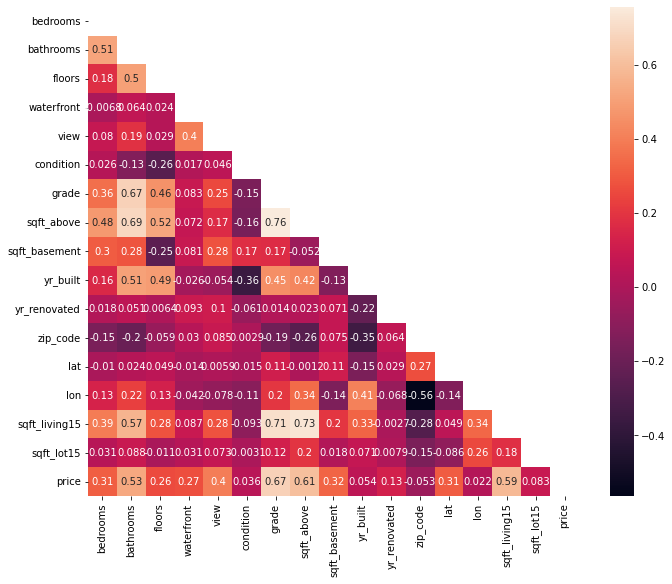

In [11]:
## miramos la correlacoión de las columnas con el gráfico de matriz de correlaciones entre las variables
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [12]:
## tras eliminar varias columnas no hay ninguna que tenga demasiada correlación con otra por lo que no eliminamos ninguna por este criterio

In [13]:
data.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zip_code', 'lat', 'lon', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

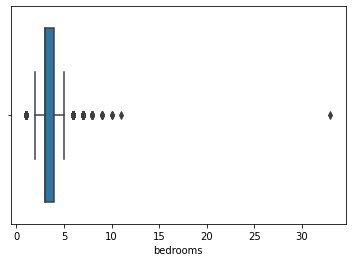

In [14]:
sns.boxplot(data=data, x= 'bedrooms');

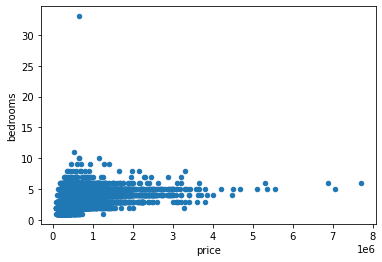

In [15]:
scatter_plot=data.plot.scatter(x='price',y='bedrooms')
scatter_plot.plot()
plt.show()

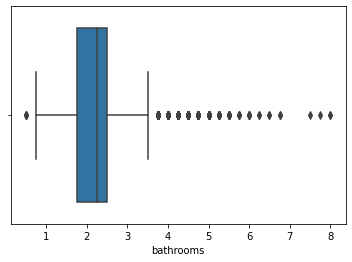

In [16]:
sns.boxplot(data=data, x= 'bathrooms');

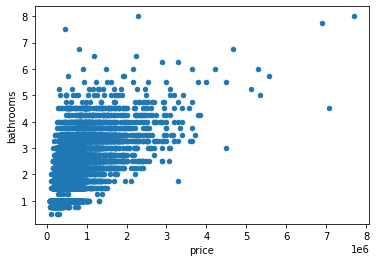

In [17]:
scatter_plot=data.plot.scatter(x='price',y='bathrooms')
scatter_plot.plot()
plt.show()

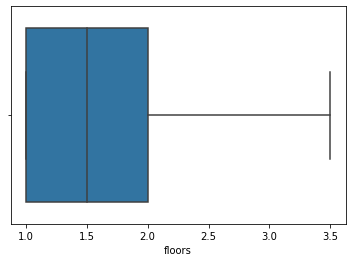

In [18]:
sns.boxplot(data=data, x= 'floors');

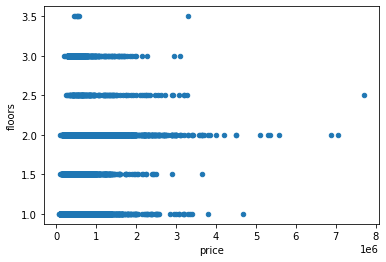

In [19]:
scatter_plot=data.plot.scatter(x='price',y='floors')
scatter_plot.plot()
plt.show()

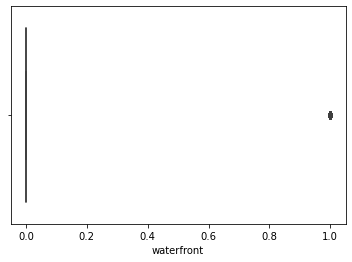

In [20]:
sns.boxplot(data=data, x= 'waterfront');

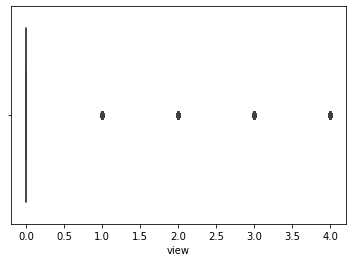

In [21]:
sns.boxplot(data=data, x= 'view');

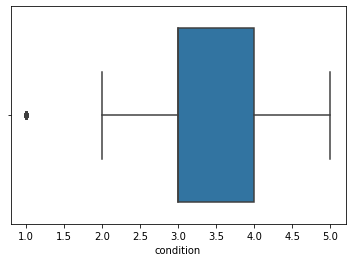

In [22]:
sns.boxplot(data=data, x= 'condition');

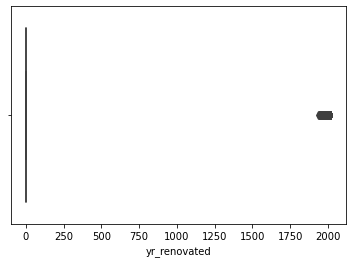

In [23]:
sns.boxplot(data=data, x= 'yr_renovated');

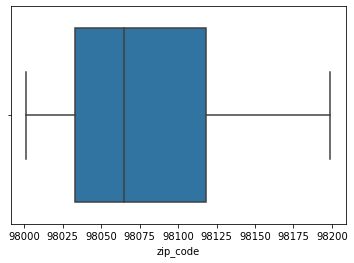

In [24]:
sns.boxplot(data=data, x= 'zip_code');

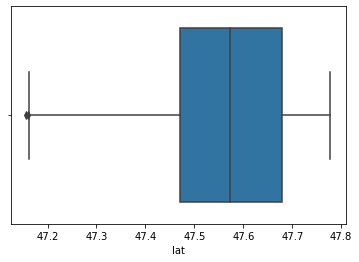

In [25]:
sns.boxplot(data=data, x= 'lat');

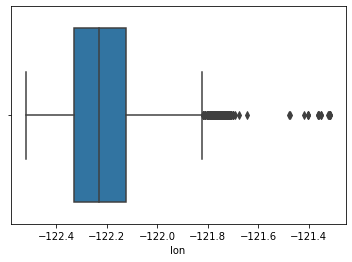

In [26]:
sns.boxplot(data=data, x= 'lon');

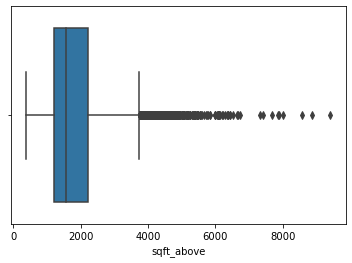

In [27]:
sns.boxplot(data=data, x= 'sqft_above');

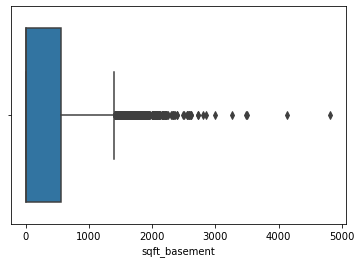

In [28]:
sns.boxplot(data=data, x= 'sqft_basement');

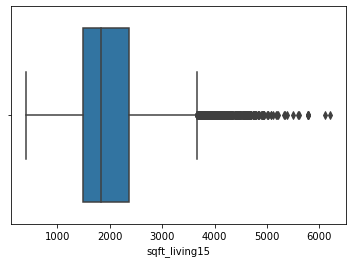

In [29]:
sns.boxplot(data=data, x= 'sqft_living15');

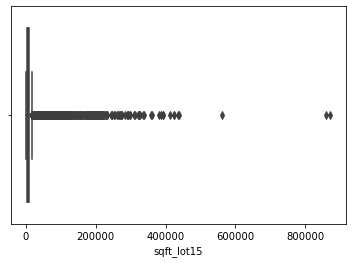

In [30]:
sns.boxplot(data=data, x= 'sqft_lot15');

In [31]:
## eliminamos columnas irelevantes consideradas tras inspección visual de las gráficas previas

data = data.drop(['bathrooms', 'bedrooms'], axis=1)

In [32]:
## eliminamos outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [33]:
for c in data.columns:
    remove_outlier(data, c)

In [34]:
data['yr_last_ren'] = [2015-x if x!=0 else 2015-data.loc[i,'yr_built'] for i,x in enumerate(data['yr_renovated'])]
data.drop(['yr_renovated'],axis =1, inplace = True)

In [35]:
data = data.drop(['grade'], axis = 1)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,explained_variance_score

## from sklearn.preprocessing import minmax_scale 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [37]:
##escalamos los datos
for c in data.columns[0:-1]:
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))
    data.head()

In [38]:
from sklearn.model_selection import train_test_split as tts

x = data.drop(columns = ['price'])
y = data['price']

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)
print(x.shape)
print(y.shape)

(21596, 13)
(21596,)


In [39]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


rfr=RFR()
rfr.fit(X_train, y_train)


y_pred_rfr = rfr.predict(X_test)
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


elastic=ElasticNet()
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)


lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train)
y_pred_linreg=linreg.predict(X_test)


models=[linreg, lasso, ridge, elastic, rfr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr]
for i in range(len(models)):
    train_score=models[i].score(X_train, y_train)
    test_score=models[i].score(X_test, y_test)
    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.6619802293853823 -- test R2: 0.6576418998147464
Model: lasso, train R2: 0.010224024030192624 -- test R2: 0.009757777844925375
Model: ridge, train R2: 0.6619802256625411 -- test R2: 0.6576484906782705
Model: elastic, train R2: 0.09079616756173592 -- test R2: 0.09391347641726722
Model: rfr, train R2: 0.9815037352902722 -- test R2: 0.8674791277065435


-------------------
# Cross Validation
------------------

In [59]:
import pandas as pd
import numpy as np 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv("regression_data.csv")

In [62]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

In [63]:
X = df.iloc[:, 2:] # Variables numéricas. En este modelo representan las variables independientes que explicaran la variable categórica.
Y = df.iloc[:, 1] # Variable Categórica. La que queremos predecir. La que nos indicara si el cancer es benigno o maligno.
X.head()

3     1  1180    5650  1.1  0  0.1  3.1   7  1180.1   0.2  1955   0.3  \
0  3  2.25  2570    7242  2.0  0    0    3   7    2170   400  1951  1991   
1  2  1.00   770   10000  1.0  0    0    3   6     770     0  1933     0   
2  4  3.00  1960    5000  1.0  0    0    5   7    1050   910  1965     0   
3  3  2.00  1680    8080  1.0  0    0    3   8    1680     0  1987     0   
4  4  4.50  5420  101930  1.0  0    0    3  11    3890  1530  2001     0   

   98178  47.5112  -122.257  1340  5650.1   221900  
0  98125  47.7210  -122.319  1690    7639   538000  
1  98028  47.7379  -122.233  2720    8062   180000  
2  98136  47.5208  -122.393  1360    5000   604000  
3  98074  47.6168  -122.045  1800    7503   510000  
4  98053  47.6561  -122.005  4760  101930  1230000

In [64]:
Y.value_counts()

6/23/14    142
6/25/14    131
6/26/14    131
7/8/14     127
4/27/15    126
          ... 
1/17/15      1
1/31/15      1
5/24/15      1
11/2/14      1
7/27/14      1
Name: 10/13/14, Length: 372, dtype: int64

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, Y_train)
resultado = modelo.score(X_test, Y_test)
print(resultado)

0.004630344188918043


In [66]:
from sklearn.model_selection import KFold

modelo = DecisionTreeClassifier()
kfold_validacion = KFold(10)

In [67]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, X, Y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.0037037  0.00138889 0.00231481 0.00416667 0.00648148 0.00231481
 0.00185271 0.00555813 0.0041686  0.00509495]


0.0037044756660319423